Consigna:

A partir del dataset de pesos y alturas, construir manualmente (sin usar sklearn) un Clasificador Bayesiano LDA. Para calcular los parámetros, utilizar las fórmulas compartidas en la notebook correspondiente.

Se pide:

- Accuracy de train
- Accuracy de validación
- Entrenar el modelo utilizando la implementación provista por sklearn. Comparar las métricas obtenidas con las métricas obtenidas manualmente. Comparar los parámetros obtenidos. Explicar las diferencias.
- Reentrenar el modelo pero en vez de utilizar como entradas p y a, entrar al modelo con p, p^2, a, a^2, y p*a. A este preprocesamiento de la entrada se lo llama extensión cuadrática.
    - El umbral de decisión sigue siendo lineal?
    - Cuántos parámetros tiene el modelo ahora?
    - Cuántos parámetros tenía antes?
    - Cómo dan las métricas de train y validación?
- Utilizando la librería sklearn y sin necesidad de entender cómo se entrena (correr el método .fit), entrenar el modelo LogisticRegression utilizando como parámetro C=1e12.
- Informar métricas, parámetros y umbral de decisión. En clase analizaremos la comparación con lo obtenido por LDA.

La entrega es un link de github que contenga la notebook (ya corrida) con las respuestas.

Ayudas:

- Miren las notebooks y copien código de ahí. Fíjense bien los métodos fit, predict y predict_proba provistos por sklearn.
- Miren la documentación de sklearn, es super completa.
- Para visualizar los umbrales de decisión se pueden ayudar con este código:

fig = plt.figure(figsize=(20,10))

ax = fig.gca()

cm = plt.cm.RdBu

cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)

plt.colorbar(cf, ax=ax)

ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)

plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, alpha=0.5)

plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, alpha=0.5)

ax.set_ylabel('Alturas [cms]')

ax.set_xlabel('Pesos [kgs]')

plt.title('Regresión Logística')

plt.show()

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def get_gauss_prob(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres)
    N_class_1 = len(data_hombres)
    N_class_2 = len(data_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2
def get_acc_gauss(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    p_class_1, p_class_2 = get_gauss_prob(data[['Peso', 'Altura']].values, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

N=-1
data = pd.read_csv('Actividad1_alturas-pesos-mils-train.csv')[:N]
test = pd.read_csv('Actividad1_alturas-pesos-mils-test.csv')
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

mean_hombres = data_hombres.mean(axis=0)
mean_mujeres = data_mujeres.mean(axis=0)
cov_LDA = np.cov(np.vstack([data_hombres - mean_hombres, data_mujeres - mean_mujeres]).T)

mujeres = len(data_mujeres)/(len(data_hombres)+len(data_mujeres))
print("Probabilidad de mujeres:",mujeres)
hombres = 1 - mujeres
print("Probabilidad de hombres:",hombres)

acc_train_LDA =  get_acc_gauss(data, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)
print("Efectividad del train:",acc_train_LDA)

acc_test_LDA = get_acc_gauss(test, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)
print("Efectividad del test:",acc_test_LDA)


Probabilidad de mujeres: 0.49981247655956995
Probabilidad de hombres: 0.50018752344043
Efectividad del train: 0.9167395924490561
Efectividad del test: 0.9225


Efectividad del train: 0.9167395924490561
Efectividad del test: 0.9225


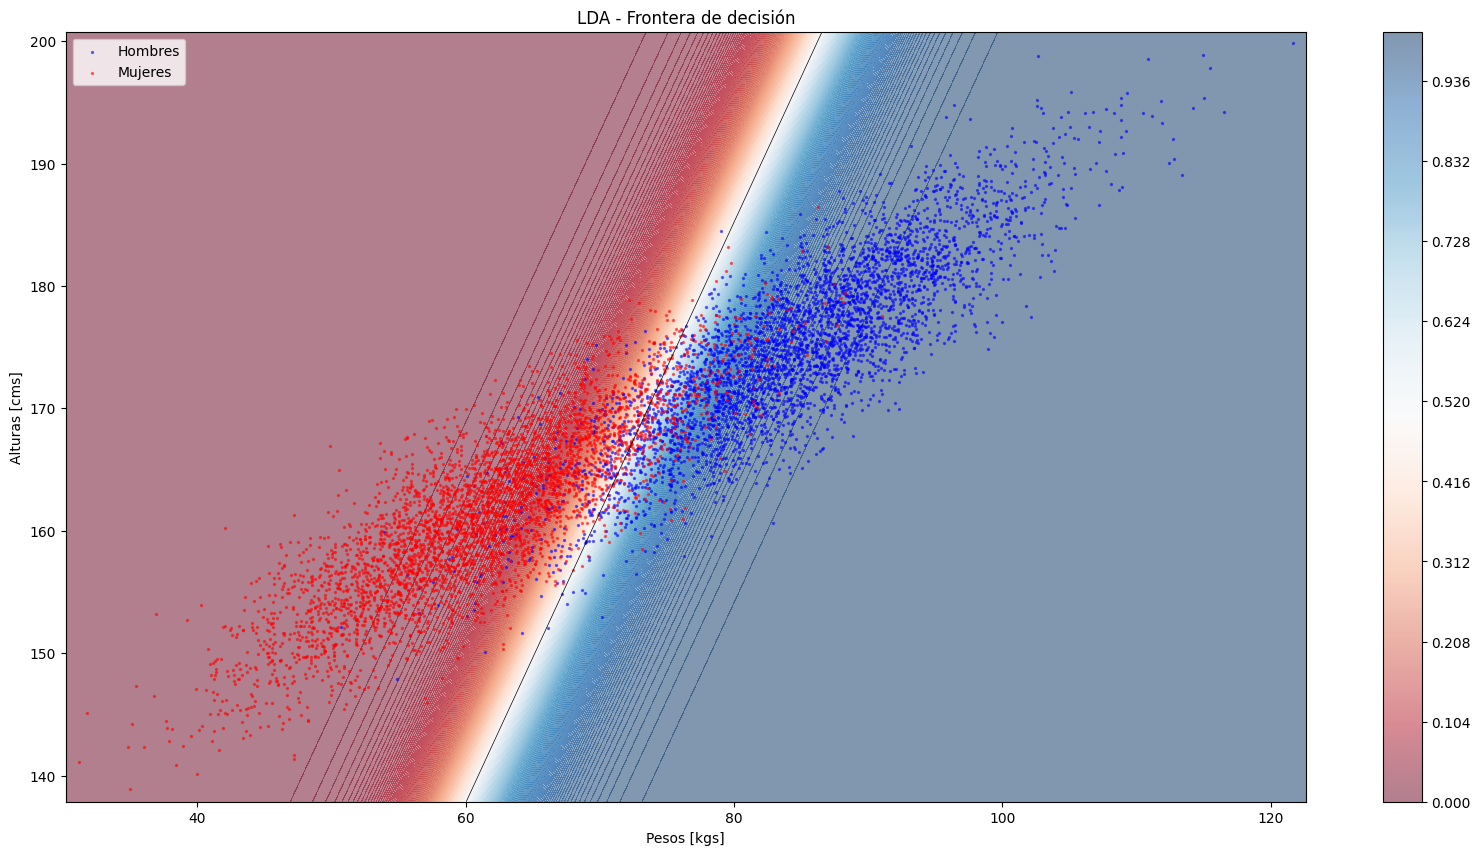

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

N = -1
data = pd.read_csv('Actividad1_alturas-pesos-mils-train.csv')[:N]
test = pd.read_csv('Actividad1_alturas-pesos-mils-test.csv')

X_train = data[['Peso', 'Altura']].values
y_train = (data['Genero'] == 'Hombre').astype(int)
X_test = test[['Peso', 'Altura']].values
y_test = (test['Genero'] == 'Hombre').astype(int)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

acc_train_LDA = accuracy_score(y_train, y_train_pred)
acc_test_LDA = accuracy_score(y_test, y_test_pred)

print("Efectividad del train:", acc_train_LDA)
print("Efectividad del test:", acc_test_LDA)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
#mili capa
Z_lda = lda.predict_proba(np.column_stack([X.ravel(), Y.ravel()]))[:, 1].reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lda, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lda, (0.5,), colors='k', linewidths=0.5)  # Umbral de decisión en 0.5
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', s=2, alpha=0.5, label='Hombres')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', s=2, alpha=0.5, label='Mujeres')
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('LDA - Frontera de decisión')
plt.legend()
plt.show()

Podemos observar que tanto la efectividad del modelo ante los datos de train y test es superior a la probabilidad de hombres, por lo tanto, el modelo sirve. Además, la efectividad de train y test son muy parecidas, lo cual indica que los datos se separaon uniformemente.

Efectividad del train: 0.9157394674334292
Efectividad del test: 0.92


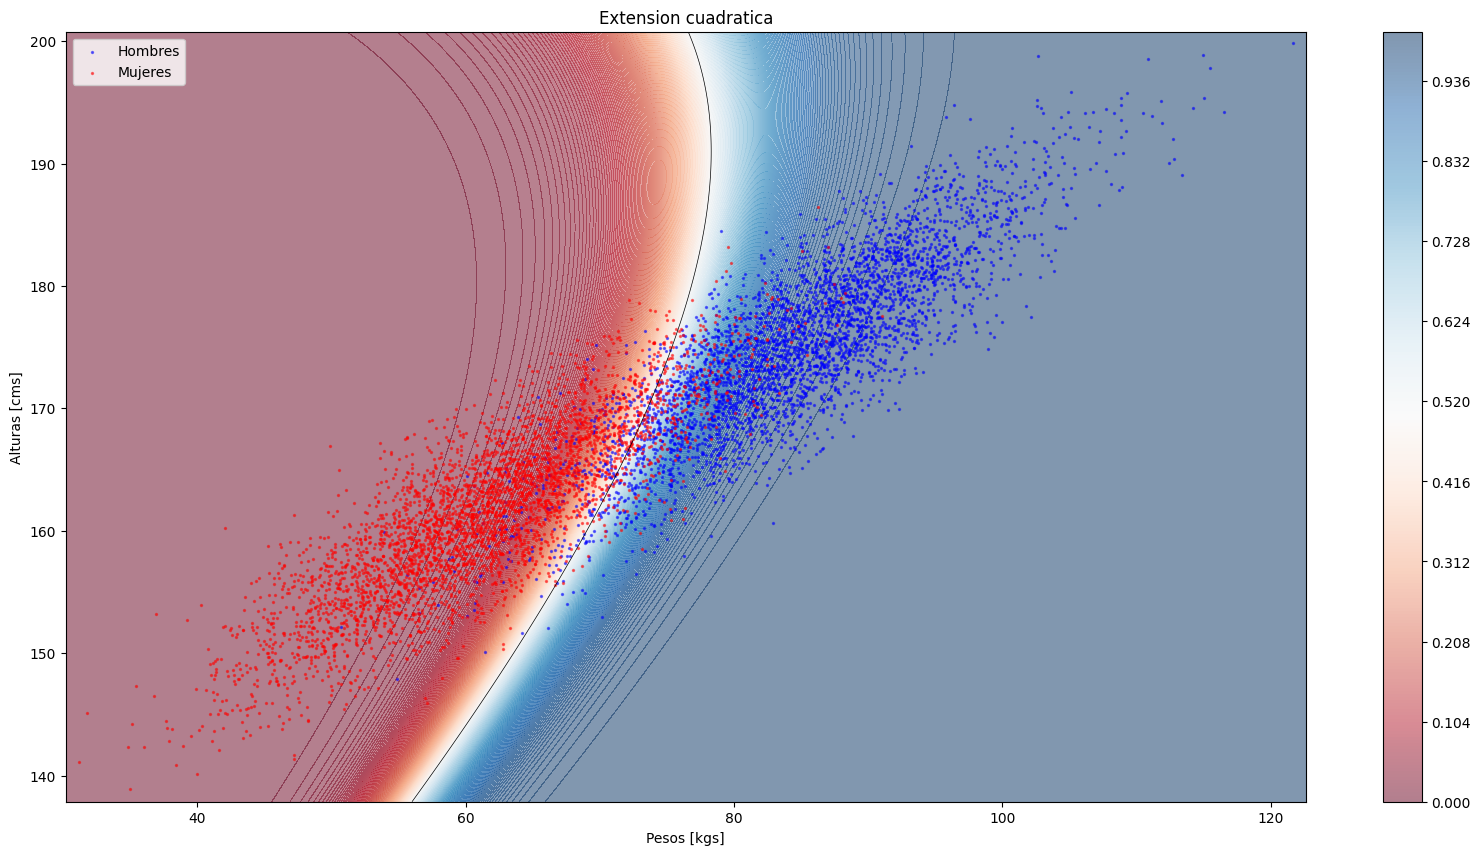

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

p_train = data['Peso'].values  
a_train = data['Altura'].values
X_train = np.column_stack([p_train, p_train**2, a_train, a_train**2, p_train * a_train])
y_train = (data['Genero'] == 'Hombre').astype(int)

p_test = test['Peso'].values
a_test = test['Altura'].values
X_test = np.column_stack([p_test, p_test**2, a_test, a_test**2, p_test * a_test])
y_test = (test['Genero'] == 'Hombre').astype(int)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

acc_train_LDA = accuracy_score(y_train, y_train_pred)
acc_test_LDA = accuracy_score(y_test, y_test_pred)

print("Efectividad del train:", acc_train_LDA)
print("Efectividad del test:", acc_test_LDA)

x_min, x_max = p_train.min() - 1, p_train.max() + 1
y_min, y_max = a_train.min() - 1, a_train.max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

X_mesh = np.column_stack([X.ravel(), X.ravel()**2, Y.ravel(), Y.ravel()**2, X.ravel() * Y.ravel()])

Z_lda = lda.predict_proba(X_mesh)[:, 1].reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lda, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lda, (0.5,), colors='k', linewidths=0.5)  # Umbral de decisión en 0.5
plt.scatter(p_train[y_train == 1], a_train[y_train == 1], color='b', s=2, alpha=0.5, label='Hombres')
plt.scatter(p_train[y_train == 0], a_train[y_train == 0], color='r', s=2, alpha=0.5, label='Mujeres')
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('Extension cuadratica')
plt.legend()
plt.show()


Se observa que el umbral de decisión deja de ser lineal, sino que se curva.

El modelo cuenta ahora con 5 parámetros, mientras que el Bayesiano LDA solo contaba con 2.

Se observa, además, que tanto la eficiencia de train y de test es menor. Por lo tanto, el clasificador LDA es superior el de extensión cuadrada en este caso.

Efectividad del train: 0.917364670583823
Efectividad del test: 0.922


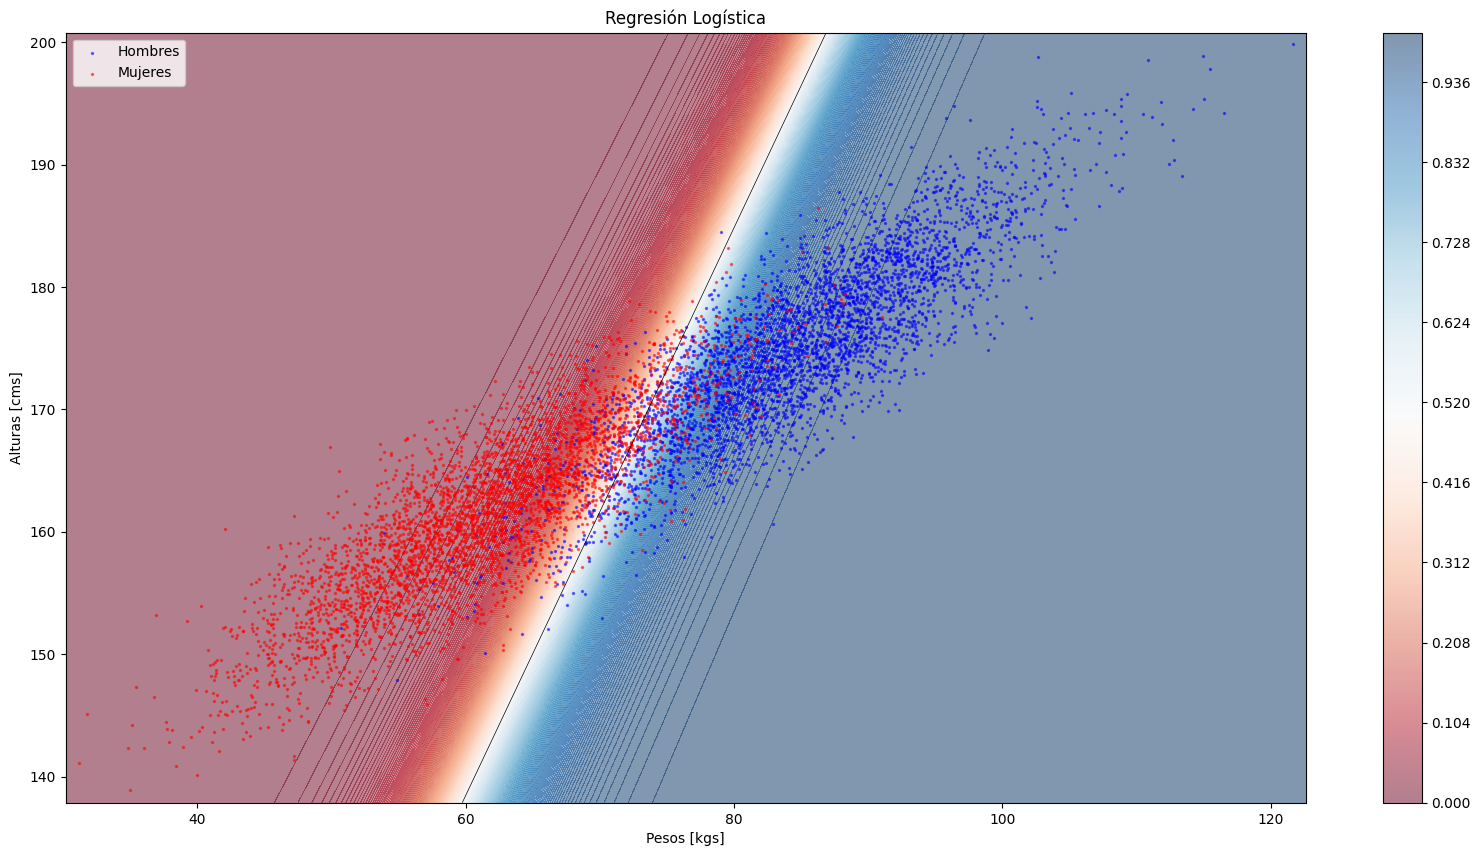

In [123]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e12, solver='lbfgs')
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

acc_train_logreg = accuracy_score(y_train, y_train_pred)
acc_test_logreg = accuracy_score(y_test, y_test_pred)

print("Efectividad del train:", acc_train_logreg)
print("Efectividad del test:", acc_test_logreg)

x_min, x_max = p_train.min() - 1, p_train.max() + 1
y_min, y_max = a_train.min() - 1, a_train.max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

X_mesh = np.column_stack([X.ravel(), X.ravel()**2, Y.ravel(), Y.ravel()**2, X.ravel() * Y.ravel()])

Z_lr = logreg.predict_proba(X_mesh)[:, 1].reshape(X.shape)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)  # Umbral de decisión en 0.5
plt.scatter(p_train[y_train == 1], a_train[y_train == 1], color='b', s=2, alpha=0.5, label='Hombres')
plt.scatter(p_train[y_train == 0], a_train[y_train == 0], color='r', s=2, alpha=0.5, label='Mujeres')
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('Regresión Logística')
plt.legend()
plt.show()